### Anomaly Detection Using ARIMA Model

In Machine Learning ARIMA model is generally a class of statistical models that give outputs which are linearly dependent on their previous values in the combination of stochastic factors. The ARIMA model works by using a distributed lag model in which algorithms are used to predict the future based on the lagged values. Here we use an ARIMA model for Anomaly Detection.

The importance of Anomaly Detection is not limited to security, but it is used for detection of any event that does not conform to our expectations.

In [1]:
# import os
# !pip3 install git+https://github.com/RJT1990/pyflux

In [5]:
import pyflux as pf
import pandas as pd
from datetime import datetime

<b>Using data based on per-minute metrics of the host’s CPU utilization:</b>

In [6]:
url1 = "https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv"
url2 = "https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv"

data_train_a = pd.read_csv(url2)
data_test_a = pd.read_csv(url1)

In [7]:
data_train_a.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


<b>Visualizing the data:</b>

Text(0.5, 1.0, 'CPU Utilization')

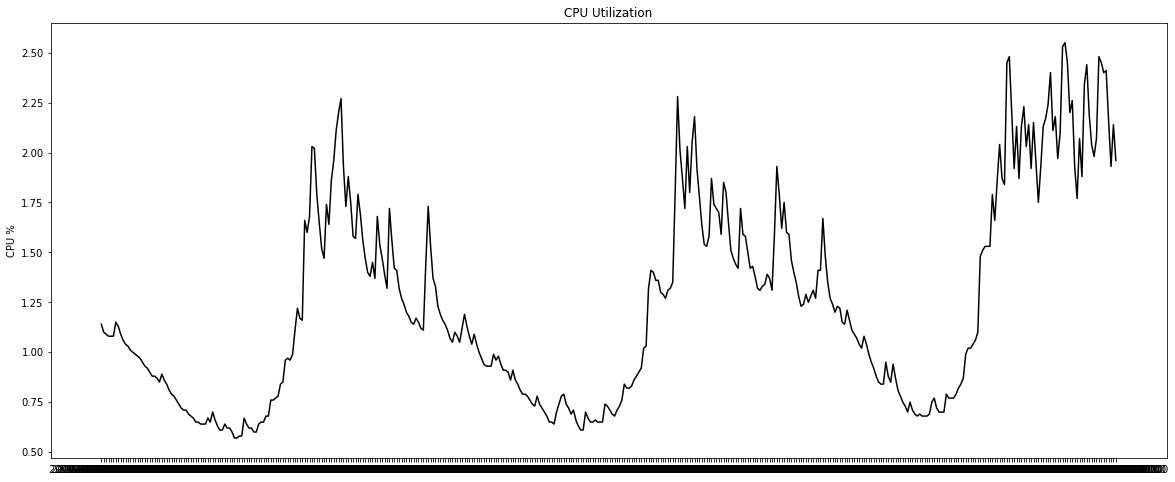

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], color = 'black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')

<b>Using ARIMA model for making predictions on the data:</b>

In [9]:
model_a = pf.ARIMA(data = data_train_a, ar = 11, ma = 11, integ = 0, target = 'cpu')
x = model_a.fit("M-H")

Acceptance rate of Metropolis-Hastings is 0.0
Acceptance rate of Metropolis-Hastings is 0.0513
Acceptance rate of Metropolis-Hastings is 0.09905
Acceptance rate of Metropolis-Hastings is 0.16745
Acceptance rate of Metropolis-Hastings is 0.2649

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.302925


<b>Visualizing the model fit:</b>

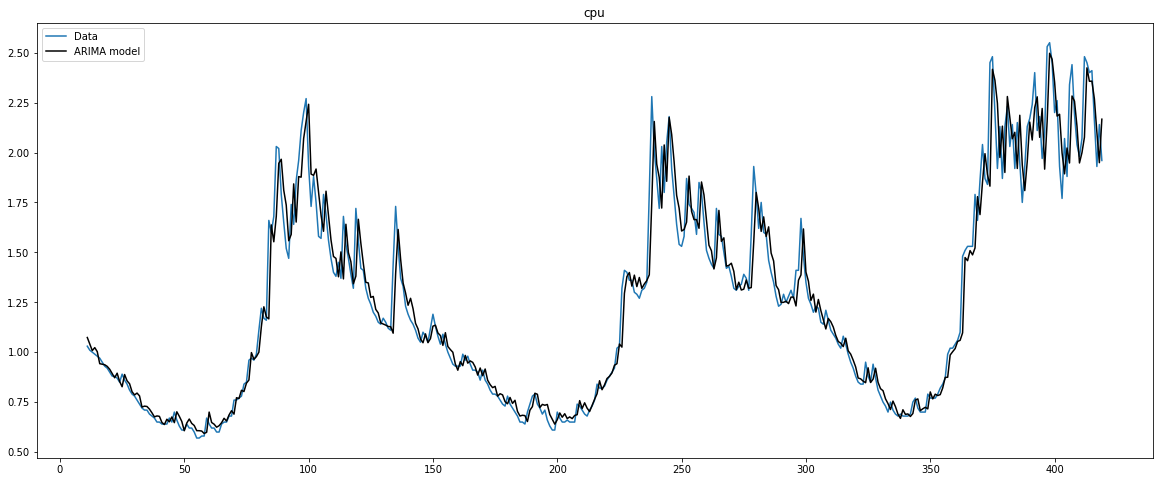

In [10]:
model_a.plot_fit(figsize = (20, 8))

<b>Sample test to evaluate the performance of the model:</b>

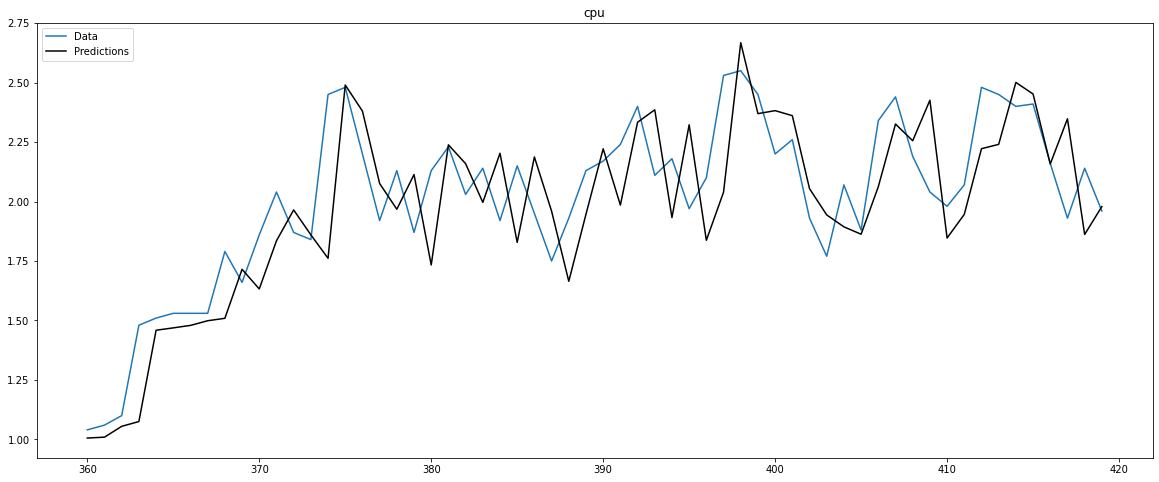

In [11]:
model_a.plot_predict_is(h = 60, figsize = (20, 8))

# in-sample / training set

<b>Running the actual predictions by using the most recent 100 observed data points being followed by the 60 predicted points:</b>

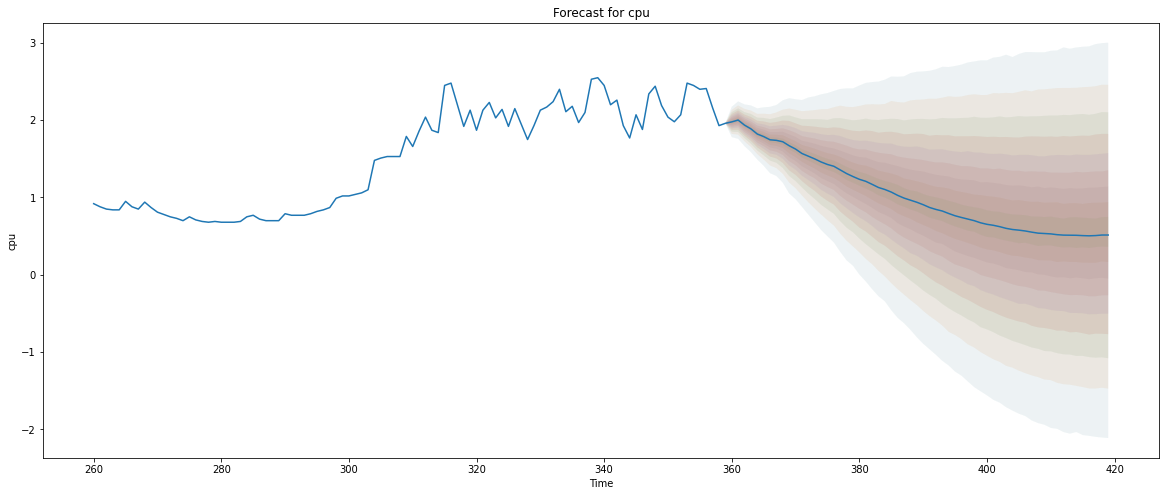

In [12]:
model_a.plot_predict(h = 60, past_values = 100, figsize = (20, 8))

<b>Performing the same anomaly detection on another segment of the CPU utilization dataset captured at a different time:</b>

Text(0.5, 1.0, 'CPU Utilization')

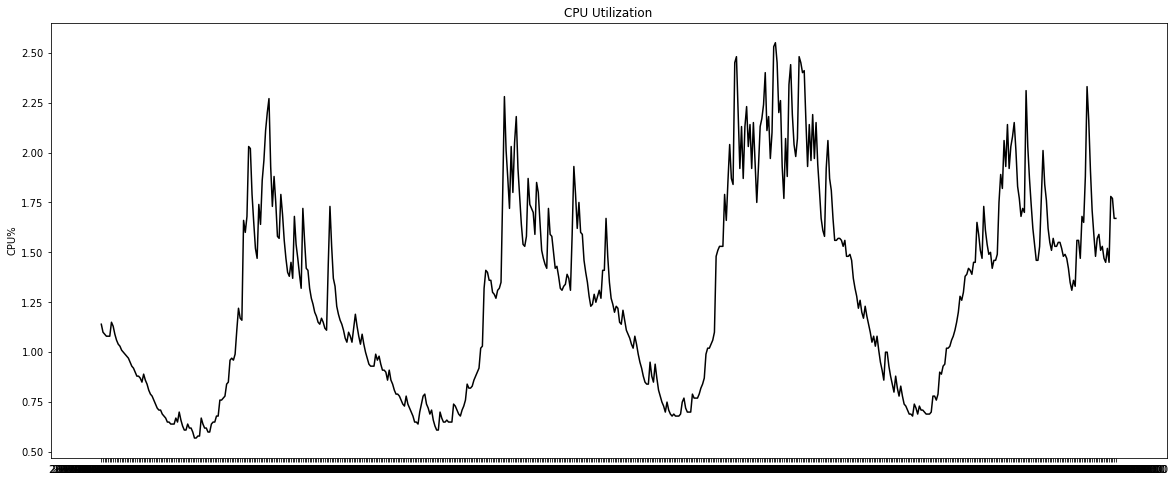

In [13]:
url3 = "https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv"
url4 = "https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv"

data_train_b = pd.read_csv(url4)
data_test_b = pd.read_csv(url3)

plt.figure(figsize = (20, 8))
plt.plot(data_train_b['datetime'], data_train_b['cpu'], color = 'black')
plt.ylabel('CPU%')
plt.title('CPU Utilization')

In [14]:
model_b = pf.ARIMA(data = data_train_b, ar = 11, ma = 11, integ = 0, target = 'cpu')
model_b.fit("M-H")

Acceptance rate of Metropolis-Hastings is 0.0
Acceptance rate of Metropolis-Hastings is 0.01695
Acceptance rate of Metropolis-Hastings is 0.20245
Acceptance rate of Metropolis-Hastings is 0.1516
Acceptance rate of Metropolis-Hastings is 0.26695

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.2767


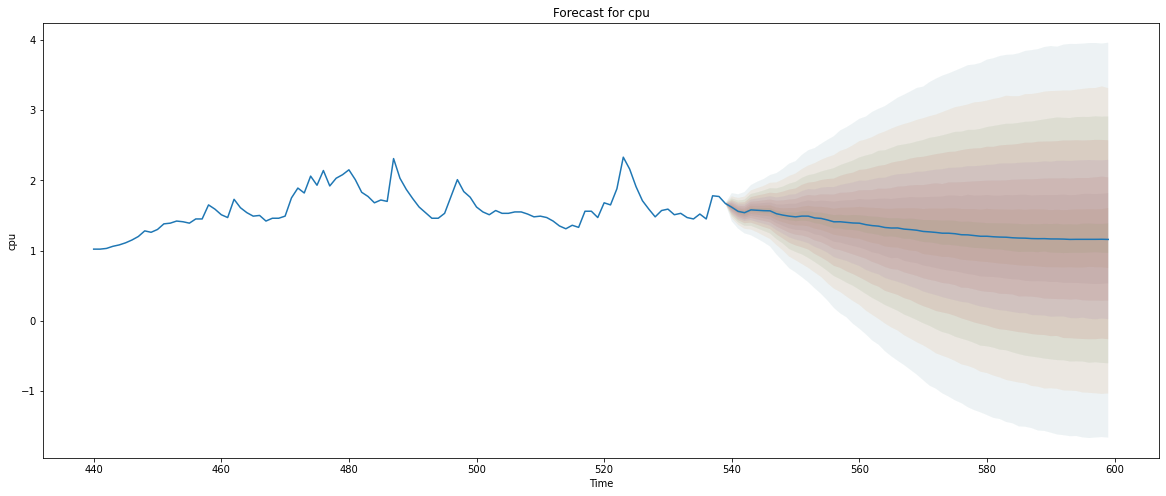

In [15]:
model_b.plot_predict(h = 60, past_values = 100, figsize = (20, 8))

We can visualize the anomaly that occurs a short time after the training period, as the observed values fall within the low-confidence bands, so it will raise an anomaly alert. 

References:
1. https://www.analyticsvidhya.com/blog/2021/08/univariate-time-series-anomaly-detection-using-arima-model/
2. https://thecleverprogrammer.com/2020/08/04/arima-model-in-machine-learning/
3. https://pyflux.readthedocs.io/en/latest/arima.html